In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# First View of the Data

In [2]:
data = pd.read_csv(r"D:\Projects\EDA on MT everest climbing death\archive\mount_everest_deaths.csv")
data.head()

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location
0,1,Dorje,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
1,2,Lhakpa,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
2,3,Norbu,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
3,4,Pasang,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
4,5,Pema,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col


In [3]:
data.shape

(310, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             310 non-null    int64  
 1   Name            310 non-null    object 
 2   Date            310 non-null    object 
 3   Age             160 non-null    float64
 4   Expedition      271 non-null    object 
 5   Nationality     309 non-null    object 
 6   Cause of death  296 non-null    object 
 7   Location        291 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.5+ KB


## Feature Engineering

### Seperating the Numerical Columns with the datasets

In [5]:
num_categories = [feature for feature in data.columns if data[feature].dtype != "O"]
data[num_categories].isnull().sum()

No.      0
Age    150
dtype: int64

Finding the Percentage of Misssing Values

In [6]:
df=pd.read_csv(r"D:\Projects\EDA on MT everest climbing death\archive\mount_everest_deaths.csv",usecols=['Age','Cause of death','Location'])
df.head()
df.isnull().mean()

Age               0.483871
Cause of death    0.045161
Location          0.061290
dtype: float64

#### Replacing the NaN values with the Random Sample Imputation

#### Random sample imputation


### Random sample imputation
Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at [random(MCAR)](https://www.ncbi.nlm.nih.gov/books/NBK493614/)

I have first applied the most used NaN value replacing type which is Mean/Median but what is shown given below:

![](https://raw.githubusercontent.com/everydaycodings/Data-Science-End-To-End-Notebook-Project/master/output/input_nann.png)

I show that If I use the `Median()` function I get a difference in actual age and median age as you can see in the data.

So I tried using `Random sample imputation` now you can see that how Age_random is overlapping the Age(actual Age)

So I decided to use `Random sample imputation`

#### If you want  code for above plot
```bash
  def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index   
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
```

```bash
impute_nan(df, "Age", median)
```

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]

    ##It will have the random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index   

    df.loc[df[variable].isnull(),variable+'_random']=random_sample
impute_nan(df, "Age", median)

## Seperating the Categorical Columns with the datasets

In [8]:
cat_categories = [feature for feature in data.columns if data[feature].dtype == "O"]
data[cat_categories].isnull().sum()

Name               0
Date               0
Expedition        39
Nationality        1
Cause of death    14
Location          19
dtype: int64

### Filling all the NaN values with ["unknown values"] in Ctegorical Column using `fillna()` function 

In [9]:
data[cat_categories] = data[cat_categories].fillna("unknown values")
data.head()

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location
0,1,Dorje,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
1,2,Lhakpa,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
2,3,Norbu,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
3,4,Pasang,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
4,5,Pema,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col


# EDA On The Dataset

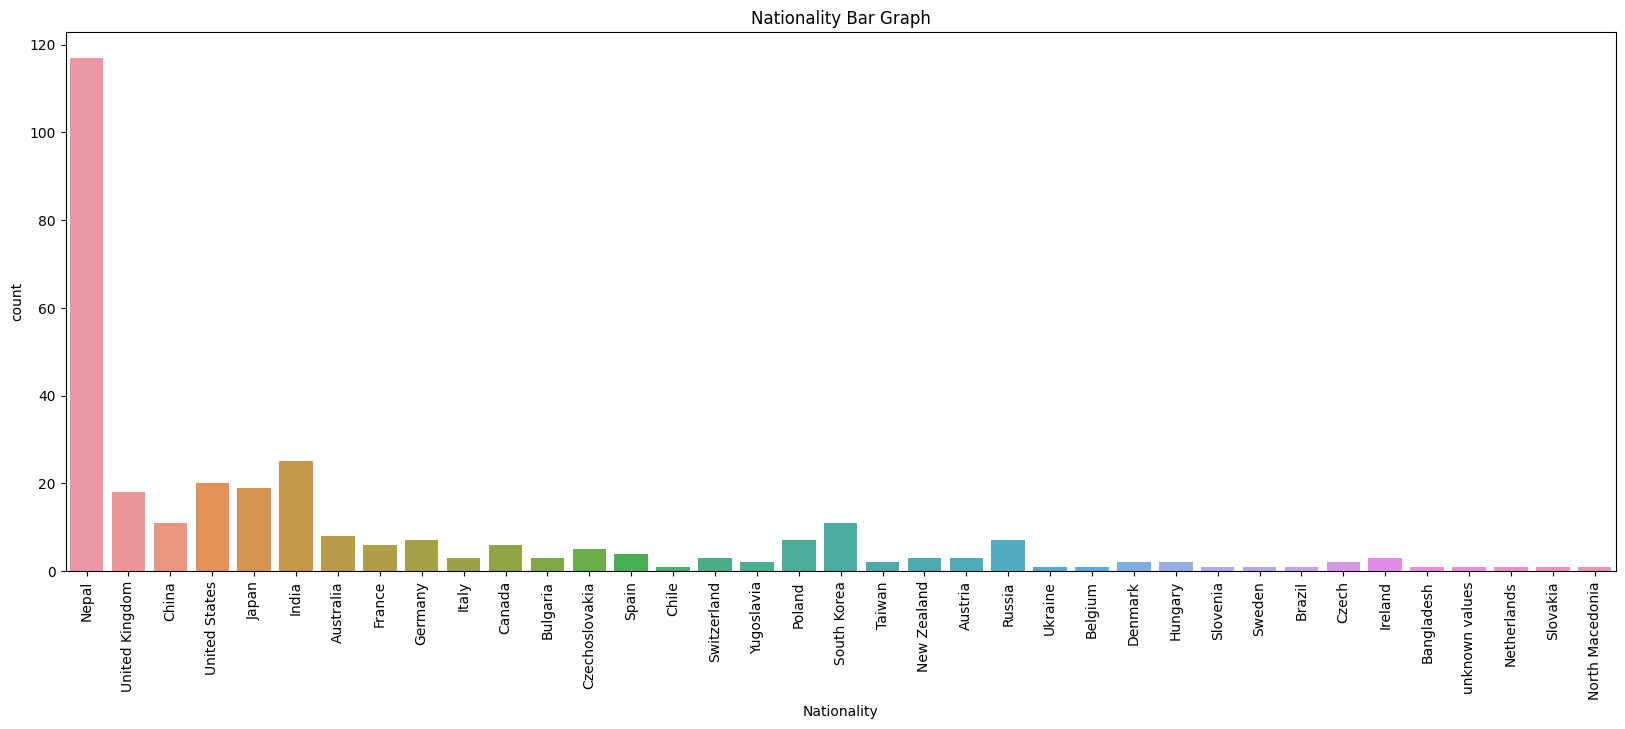

In [10]:
plt.figure(figsize=(20,7))
sns.countplot(x="Nationality", data=data)
plt.title('Nationality Bar Graph')
plt.xticks(rotation=90)
plt.show()